<a href="https://colab.research.google.com/github/jabpcomplex/Analisis-de-datos-Covid19/blob/main/owid_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de Datos Matplotlib y Pandas

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Especificar la ruta o dirección de los archivos

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
ruta = "/content/drive/My Drive/Colab Notebooks/Covid-19/Datos/"
img = "/content/drive/My Drive/Colab Notebooks/Covid-19/imagenes/"


from numpy.linalg import inv 
%matplotlib inline

In [ ]:
#### Leer  archivo CSV y convertilo en un Dataframa
#df= pd.read_csv(ruta+"Casos_Diarios_Estado_Nacional_Confirmados_20210629.csv",parse_dates=True,index_col=None)
df = pd.read_csv(ruta+"owid-covid-data-260222.csv",parse_dates=True ,index_col=None)

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
### Imprime el dataframe
df[df["location"]=="Mexico"].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
96915,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
96916,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,97.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
96917,MEX,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,186.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
96918,MEX,North America,Mexico,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,231.0,0.002,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
96919,MEX,North America,Mexico,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,312.0,0.002,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,-78.5,-0.47,-0.47,-0.602631


#Filtrado de Datos
**filtramos la información para méxico**

In [ ]:
mex_cov19 = df[(df["location"] == "Mexico")]
print("Dimensiones dataframe de México\n")
print(mex_cov19.shape)
#filtrados  de cuba
#cuba_cov19 = df[df["location"]=="Cuba"]
#print("\nDimensiones dataframe de Cuba\n")
#print(cuba_cov19.shape)

Dimensiones dataframe de México

(787, 67)


In [ ]:
#Primeros dos elementos de mex_cov19
mex_cov19.head(2)
#Primeros dos elementos de cuba_cov19
#cuba_cov19.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
96915,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
96916,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,97.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN


In [ ]:
#Últimos dos elementos de mex_cov19
mex_cov19.tail(2)
#Últimos dos elementos de cuba_cov19
#cuba_cov19.tail(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
97700,MEX,North America,Mexico,2022-02-24,5473489.0,18252.0,15297.714,317303.0,362.0,386.429,42019.006,140.117,117.438,2435.879,2.779,2.967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
97701,MEX,North America,Mexico,2022-02-25,5473489.0,NaN,NaN,317303.0,NaN,NaN,42019.006,NaN,NaN,2435.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN


In [ ]:
#Método iloc indexadores o indices numéricos
# localiza loc[fila][columna]
print("\nPrimer día registado para los casos de México\n")
print(mex_cov19.iloc[0][3])
print("\nÚltimo día registado para los casos de México\n")
print(mex_cov19.iloc[786][3])

#print("\nPrimer día registado para los casos de Cuba\n")
#print(cuba_cov19.iloc[28766][3])
#print("\nÚltimo día registado para los casos de Cuba\n")
#print(cuba_cov19.iloc[29372][3])


Primer día registado para los casos de México

2020-01-01

Último día registado para los casos de México

2022-02-25


In [ ]:
#print("Primer caso para México: 27 de Febrero 2020")
mex_cov19.iloc[77][0:13]
#print(mex_cov19.shape)

iso_code                                    MEX
continent                         North America
location                                 Mexico
date                                 2020-03-18
total_cases                               118.0
new_cases                                  25.0
new_cases_smoothed                       15.714
total_deaths                                NaN
new_deaths                                  NaN
new_deaths_smoothed                         NaN
total_cases_per_million                   0.906
new_cases_per_million                     0.192
new_cases_smoothed_per_million            0.121
Name: 96992, dtype: object

## **Gráficas**


In [ ]:
#indexador
#set_index(['column_name_1',' column_name_2'])

#total_cases_per_millon
mexico_total_cases_millon = mex_cov19.set_index('date').iloc[0:786,9:10]
#cuba_total_cases_millon = cuba_cov19.set_index('date').iloc[0:607,9:10]

mexico_new_cases = mex_cov19.set_index('date').iloc[0:786,4:5]
#cuba_new_cases = cuba_cov19.set_index('date').iloc[0:607,4:5]
#new_cases_per_millon
mexico_new_cases_millon = mex_cov19.set_index('date').iloc[0:786,10:11]
#cuba_new_cases_millon = cuba_cov19.set_index('date').iloc[0:607,10:11]

mexico_total_deaths = mex_cov19.set_index('date').iloc[0:786,6:7]
#cuba_total_deaths = cuba_cov19.set_index('date').iloc[0:607,6:7]

mexico_new_deaths = mex_cov19.set_index('date').iloc[0:786,7:8]  
#cuba_new_deaths = cuba_cov19.set_index('date').iloc[0:607,7:8]

In [ ]:
mexico_new_cases_millon = mexico_new_cases_millon.transpose()
#cuba_new_cases_millon  = cuba_new_cases_millon.transpose()

mexico_new_cases= mexico_new_cases.transpose()
#cuba_new_cases = cuba_new_cases.transpose()

mexico_total_cases_millon = mexico_total_cases_millon.transpose()
#cuba_total_cases_millon = cuba_total_cases_millon.transpose()

mexico_total_deaths = mexico_total_deaths.transpose()
#cuba_total_deaths =cuba_total_deaths.transpose()

mexico_new_deaths = mexico_new_deaths.transpose()
#cuba_new_deaths =cuba_new_deaths.transpose()

In [ ]:
print("Muertes por Covid19 en  México ")

print("\nTotal de muertes en México")
print(mex_cov19["total_deaths"].max())

print("\nMáximo de muertes en un dia en México")
print(mex_cov19["new_deaths"].max())


Muertes por Covid19 en  México 

Total de muertes en México
317303.0

Máximo de muertes en un dia en México
3050.0


## Definición de nuevos Casos por Millón

$$ \text{new_cases_per_millon} = \dfrac{\text{(new_cases)}(10^{6})}{\text{Poblacíon total}} $$


         Población total mexicana 128,900,000  personas en 2021
---------------------------------------------------------------
         Población total cubana 11,300,000 personas 2021

In [ ]:
#mexico_new_cases_millon.iloc[0]['2020-02-27':'2021-08-01']
mexico_new_cases.iloc[0]['2020-02-27':'2021-08-01']

#cuba_new_cases_millon.iloc[0]['2020-02-27':'2021-08-01']
#cuba_new_cases.iloc[0]['2020-02-27':'2021-08-01']

date
2020-02-27        NaN
2020-02-28        1.0
2020-02-29        3.0
2020-03-01        1.0
2020-03-02        0.0
               ...   
2021-07-28    19028.0
2021-07-29    19223.0
2021-07-30    19346.0
2021-07-31    18809.0
2021-08-01     6740.0
Name: new_cases, Length: 522, dtype: float64

## México Total de Casos por millon
### Gráfica 1 

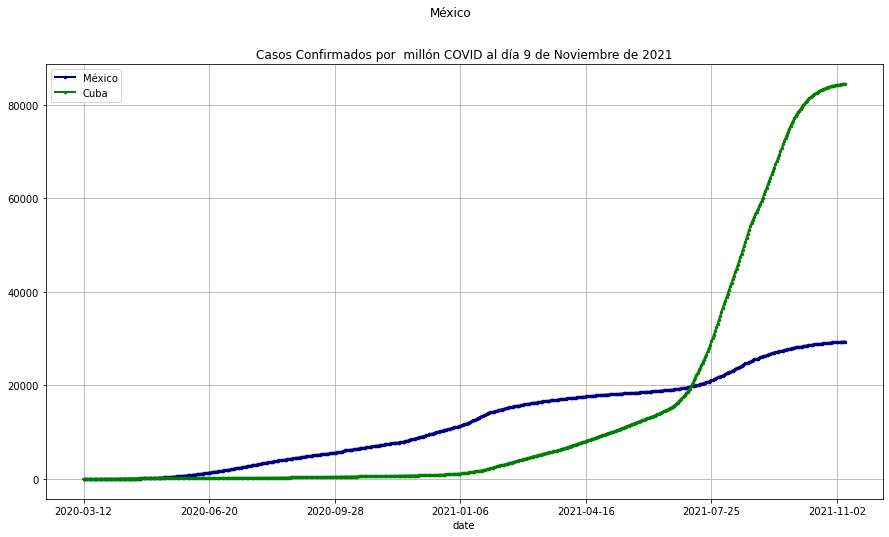

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# graficamos los datos localizados en .loc[fila][columna_inicial:column_final]
row = mexico_total_cases_millon.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='jet', marker='.', markersize=5,ax=ax)
#total_confirmados_df =row.sum()
#row = cuba_total_cases_millon.iloc[0]['2020-03-12':'2021-11-09']
#row.plot(lw=2, colormap='ocean', marker='.', markersize=5,ax=ax)

ax.legend(['México','Cuba']);plt.grid(True)
plt.title('Casos Confirmados por  millón COVID al día 9 de Noviembre de 2021');
plt.suptitle('México');

plt.show()

## México nuevos Casos
### Gráfica 2

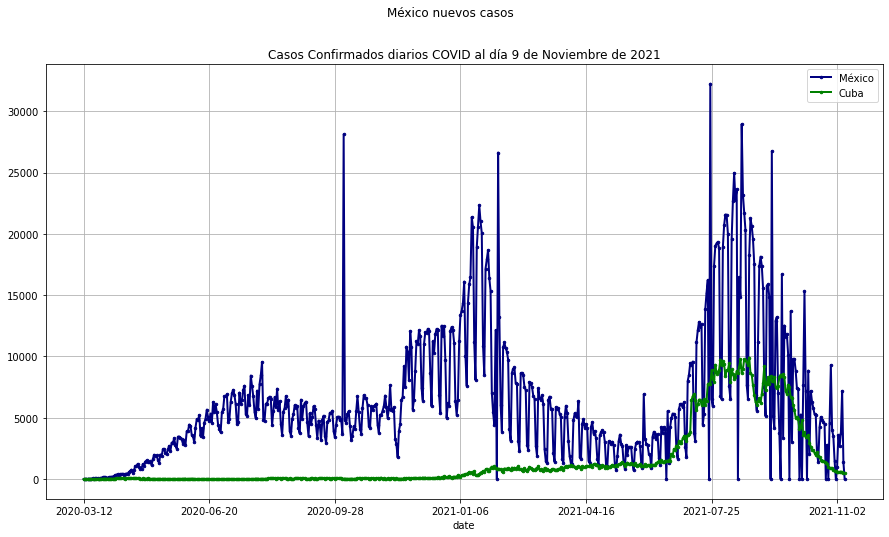

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
# graficamos los datos localizados en .loc[fila][columna_inicial:column_final]
row = mexico_new_cases.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='jet', marker='.', markersize=5,ax=ax)
#total_confirmados_df =row.sum()
row = cuba_new_cases.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='ocean', marker='.', markersize=5,ax=ax)

ax.legend(['México','Cuba']);plt.grid(True)
plt.title('Casos Confirmados diarios COVID al día 9 de Noviembre de 2021');
plt.suptitle('México nuevos casos');

plt.show()

## México nuevos Casos por millon
### Gráfica 3

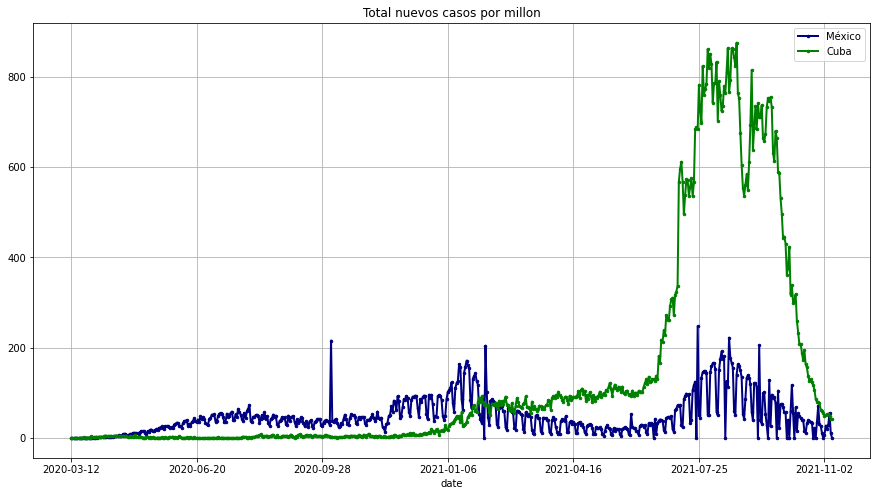

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
#elimino la columna 'nombre' para dejar sólo datos numéricos
# graficamos los datos localizados en .loc[fila][columna_inicial:column_final]
row = mexico_new_cases_millon.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='jet', marker='.', markersize=5,ax=ax)
row = cuba_new_cases_millon.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='ocean', marker='.', markersize=5,ax=ax)
ax.legend(['México','Cuba']);plt.grid(True)
plt.title('Total nuevos casos por millon')
plt.grid(True)
plt.show()

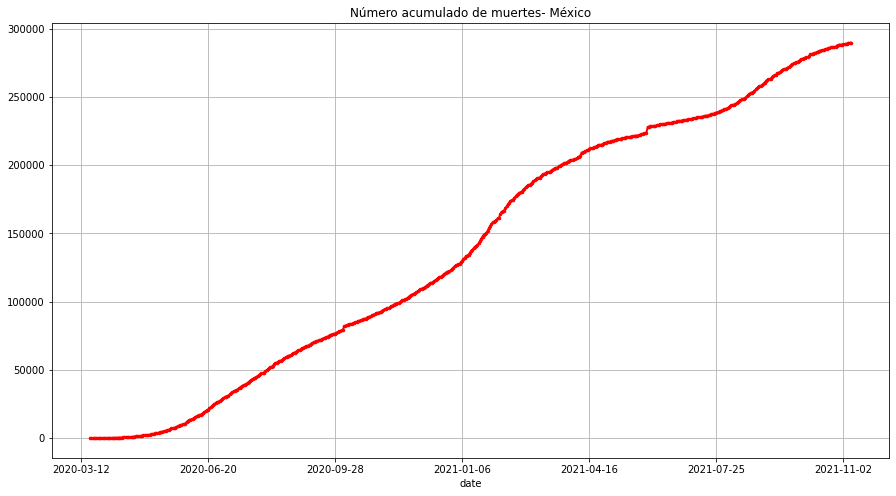

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
#elimino la columna 'nombre' para dejar sólo datos numéricos
# graficamos los datos localizados en .loc[fila][columna_inicial:column_final]
row = mexico_total_deaths.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='prism', marker='.', markersize=5,ax=ax)
#
#row = cuba_total_deaths.iloc[0]['2020-03-12':'2021-09-04']
#row.plot(lw=2, colormap='prism', marker='.', markersize=5,ax=ax)

plt.title('Número acumulado de muertes- México');plt.grid(True)
plt.show()

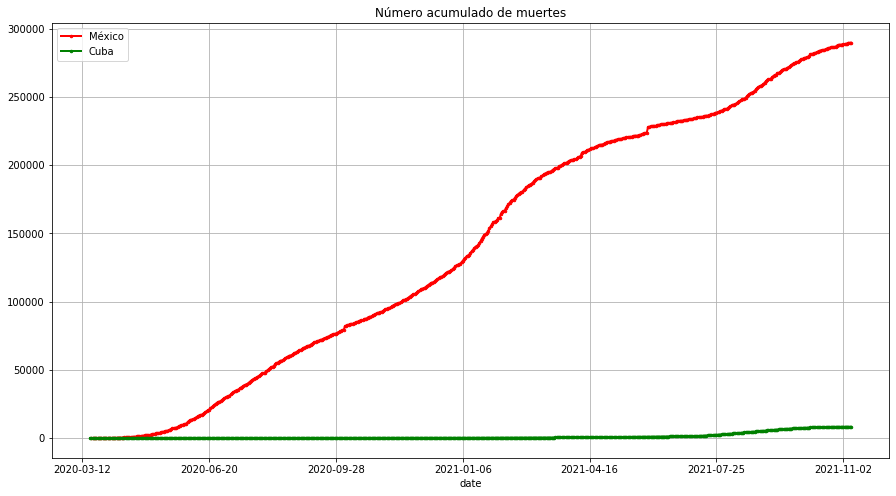

In [ ]:
### Gráfica 2
fig, ax = plt.subplots(figsize=(15,8))
#elimino la columna 'nombre' para dejar sólo datos numéricos
# graficamos los datos localizados en .loc[fila][columna_inicial:column_final]
row = mexico_total_deaths.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='prism', marker='.', markersize=5,ax=ax)
#
row = cuba_total_deaths.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='ocean', marker='.', markersize=5,ax=ax)
ax.legend(['México','Cuba'])
plt.title('Número acumulado de muertes');
plt.grid(True)
plt.show()

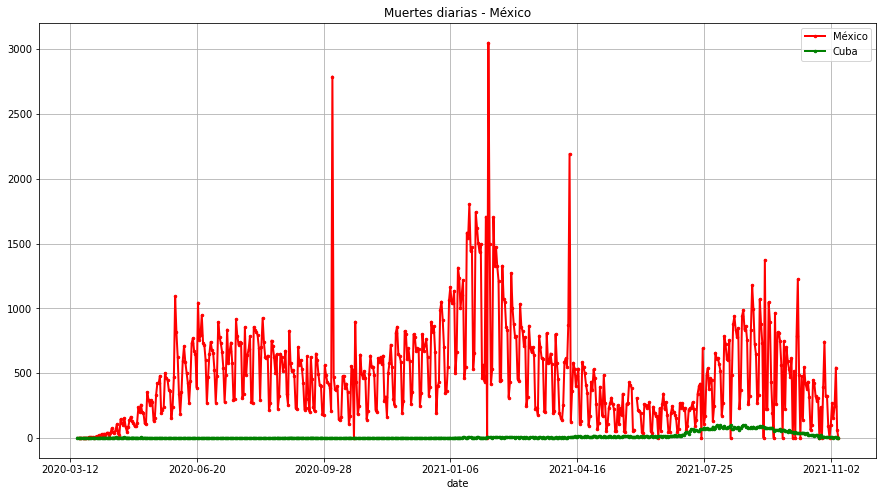

In [ ]:
### Gráfica 3
fig, ax = plt.subplots(figsize=(15,8))
#elimino la columna 'nombre' para dejar sólo datos numéricos
# graficamos los datos localizados en .loc[fila][columna_inicial:column_final]
row = mexico_new_deaths.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='prism', marker='.', markersize=5,ax=ax)

row = cuba_new_deaths.iloc[0]['2020-03-12':'2021-11-09']
row.plot(lw=2, colormap='ocean', marker='.', markersize=5,ax=ax)

ax.legend(['México','Cuba'])
plt.title('Muertes diarias - México');plt.grid(True)
plt.show()

**TERMINA PRIMER ANÁLISIS**

## Análisis de Datos Matplotlib y Pandas
## utilizando la función Groupby

In [ ]:
#data = df[["continent","date","total_cases"]]
#data.set_index('date', inplace = True)

#Varias columnas como indice
#mexico.set_index(['nombre','otro_indice'], inplace = True)

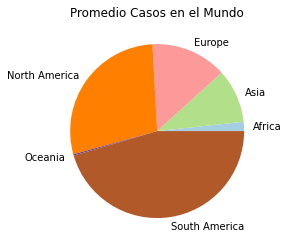

In [ ]:
#groupby función de pandas
df.groupby('continent')['total_deaths'].mean().plot(kind='pie',cmap='Paired')
plt.title('Promedio Casos en el Mundo');plt.ylabel('')
plt.show()

In [ ]:
#extraemos la información de México
mex = df[df["iso_code"] == "MEX"]
print('Filas: ', df.shape[0],'\t Columnas: ', df.shape[1])
df["new_cases"].notna().sum()
#df['new_cases'].isnull()

Filas:  132016 	 Columnas:  65


124787

In [ ]:
mex.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
77033,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
77034,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,97.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
77035,MEX,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,186.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
77036,MEX,North America,Mexico,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,231.0,0.002,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
77037,MEX,North America,Mexico,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,312.0,0.002,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,-345.3,-2.06,-2.06,-2.650807


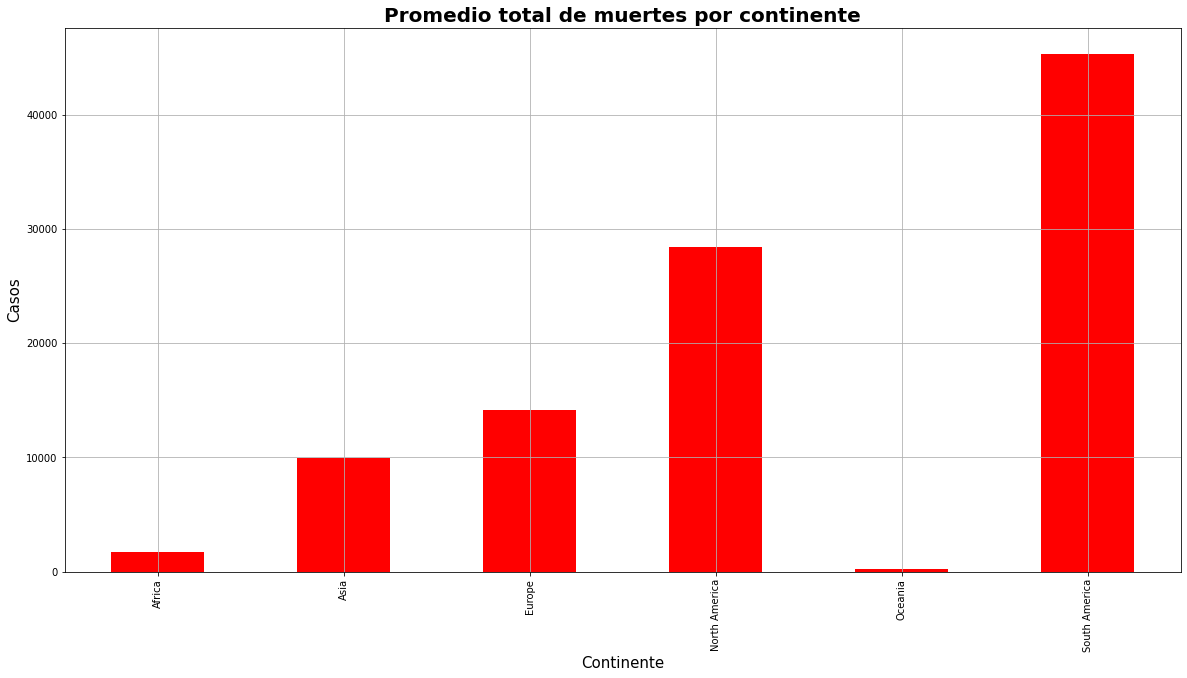

<Figure size 432x288 with 0 Axes>

In [ ]:
df.groupby('continent')['total_deaths'].mean().plot(kind='bar',figsize=(20,10),legend=False,linewidth=1,color='red',fontsize=10)
plt.title('Promedio total de muertes por continente',fontsize=20,fontweight ='bold');plt.ylabel('Casos',fontsize=15);plt.xlabel('Continente',fontsize=15);plt.grid(True)
plt.show()
plt.savefig('fig.png')

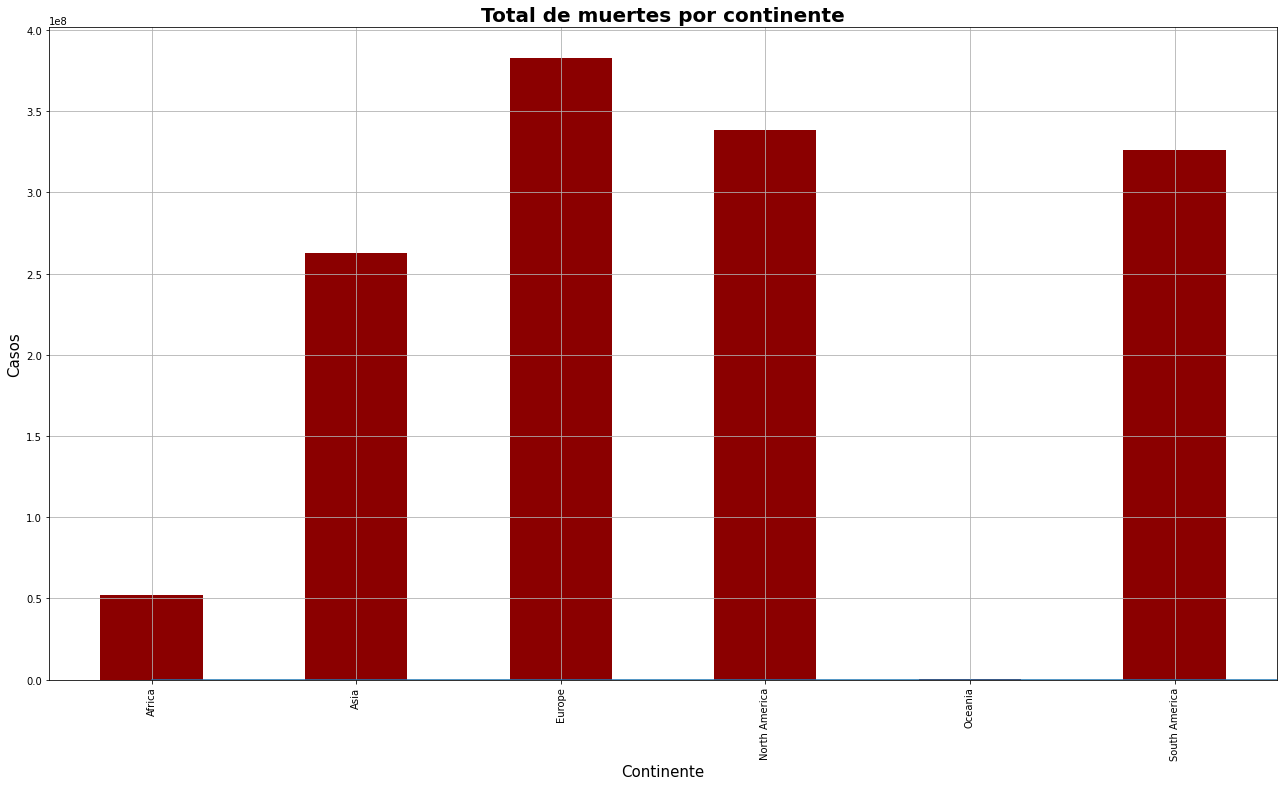

In [ ]:
fig = plt.figure()
df.groupby('continent')['total_deaths'].sum().plot(kind='bar',figsize=(22,12),legend=False,linewidth=1,color='darkred',fontsize=10)
plt.title('Total de muertes por continente',fontsize=20,fontweight ='bold');plt.ylabel('Casos',fontsize=15);plt.xlabel('Continente',fontsize=15);
plt.grid(True)
plt.plot(range(15));plt.show();
fig.savefig(img+'Total de muertes contiente.pdf',orientation='landscape',dpi=300)

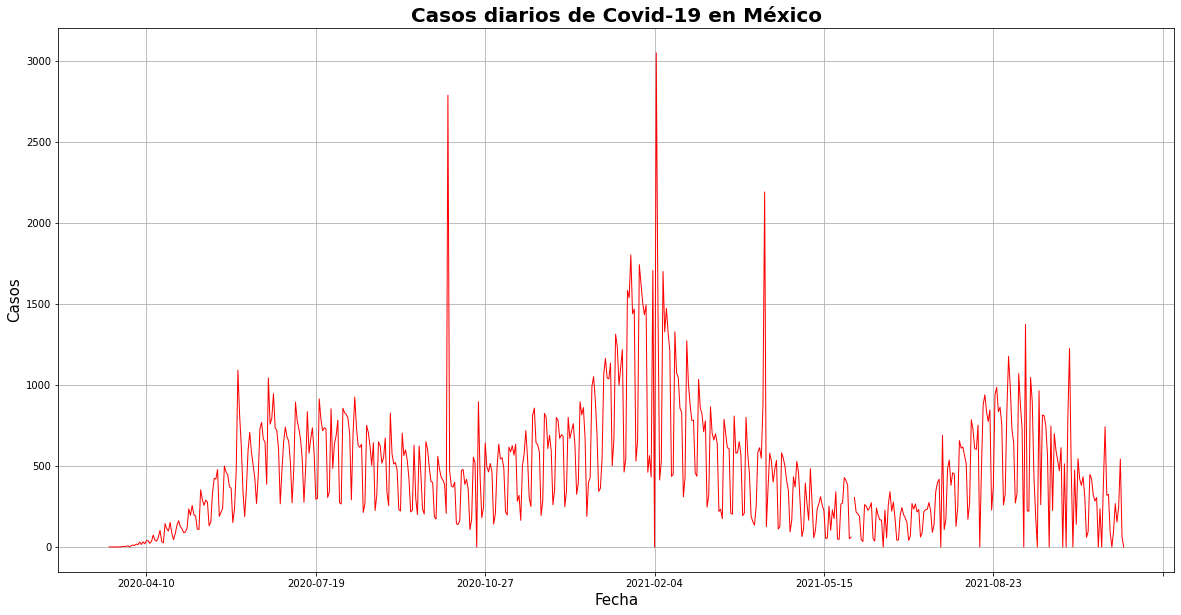

In [ ]:
mex.groupby('date')['new_deaths'].mean().plot(kind='line',figsize=(20,10),legend=False,linewidth=1,color='red',fontsize=10)
plt.title('Casos diarios de Covid-19 en México',fontsize=20,fontweight ='bold')
plt.ylabel('Casos',fontsize=15);plt.xlabel('Fecha',fontsize=15);plt.grid(True)
plt.show()

In [ ]:
#Promedio de muertes por covid enel mundo
mex["new_deaths"].mean() 

476.5642737896494

In [ ]:
#Total de muertes por covid19 en el mundo
mex["new_deaths"].sum()

285462.0

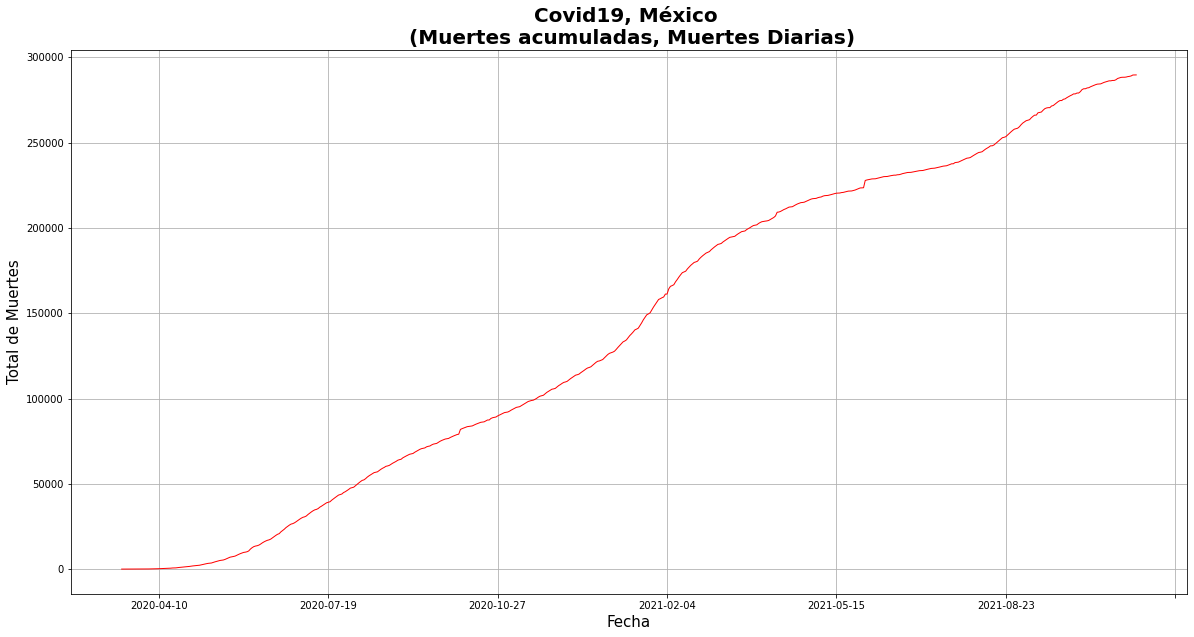

In [ ]:
mex.groupby('date')['total_deaths'].mean().plot(kind='line',figsize=(20,10),legend=False,linewidth=1,color='red',fontsize=10)
plt.title('Covid19, México \n (Muertes acumuladas, Muertes Diarias)',fontsize=20,fontweight ='bold');
plt.ylabel('Total de Muertes',fontsize=15);plt.xlabel('Fecha',fontsize=15);plt.grid()
plt.savefig('fig.png')
plt.show()

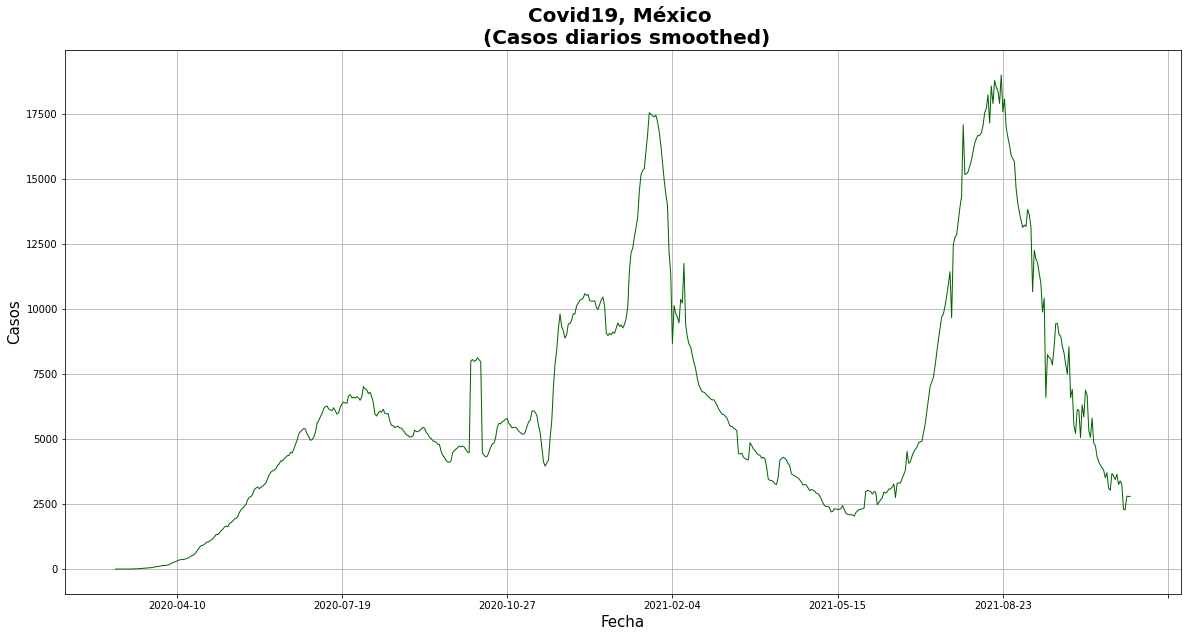

In [ ]:
mex.groupby('date')['new_cases_smoothed'].mean().plot(kind='line',figsize=(20,10),legend=False,linewidth=1,color='darkgreen',fontsize=10)
plt.title('Covid19, México \n (Casos diarios smoothed)',fontsize=20,fontweight ='bold');
plt.ylabel('Casos',fontsize=15);plt.xlabel('Fecha',fontsize=15);plt.grid()
plt.savefig('fig.png')
plt.show()